In [2]:
import import_ipynb
from library import *
from function_And_Class import get_image_paths, classify_size, Imagetransform, Mydataset, Model
from bien_URL import data_directory_Test, data_directory_animals, save_path_vgg, save_path_resnet


# Xử lý và chuẩn bị dữ liệu

In [3]:
torch.manual_seed(18)
np.random.seed(18)
random.seed(18)

In [ ]:
# Lưu ảnh và nhãn vào hai list
data_animal_1, labels_1 = get_image_paths(data_directory_Test)
data_animal_2, labels_2 = get_image_paths(data_directory_animals)
data_animal = data_animal_1 + data_animal_2
labels = list(set(labels_1 + labels_2))

# Sắp xếp tên theo bảng chữ cái
labels = sorted(labels)

In [ ]:
# Lấy kích thước ảnh (width x height)
image_sizes = [Image.open(path).size for path in data_animal]

image_wxh = [f'{w}x{h}' for w,h in image_sizes]

# Nhóm ảnh
group_labels = [classify_size(size) for size in image_sizes]

# Đếm số lượng kích thước ảnh trong từng nhóm
group_counts = Counter(group_labels)
print(group_counts)

Counter({'khac': 11905})


In [ ]:
# Kiểm tra xem có kênh màu nào khác ngoài RGB không
color_modes = [Image.open(path).mode for path in data_animal]  

# Đếm số lượng ảnh theo loại kênh màu
color_counts = Counter(color_modes)
print(color_counts)

Counter({'RGB': 11868, 'L': 36, 'CMYK': 1})


In [7]:
# Loại bỏ các nhãn trùng lặp (ví dụ: cattle với cow thì loại bỏ cattle)
labels.remove("ladybugs")
labels.remove('moth')
labels.remove('cattle')

In [9]:
# In ra nhãn và vị trí của nhãn
for i in range(len(labels)):
    print(f'{labels[i]} : {i}')

antelope : 0
badger : 1
bat : 2
bear : 3
bee : 4
beetle : 5
bison : 6
boar : 7
bull : 8
butterfly : 9
camel : 10
canary : 11
cat : 12
caterpillar : 13
centipede : 14
cheetah : 15
chicken : 16
chimpanzee : 17
cockroach : 18
cow : 19
coyote : 20
crab : 21
crocodile : 22
crow : 23
deer : 24
dog : 25
dolphin : 26
donkey : 27
dragonfly : 28
duck : 29
eagle : 30
elephant : 31
fish : 32
flamingo : 33
fly : 34
fox : 35
frog : 36
giraffe : 37
goat : 38
goldfish : 39
goose : 40
gorilla : 41
grasshopper : 42
hamster : 43
harbor seal : 44
hare : 45
hedgehog : 46
hippopotamus : 47
hornbill : 48
horse : 49
hummingbird : 50
hyena : 51
jaguar : 52
jellyfish : 53
kangaroo : 54
koala : 55
ladybug : 56
leopard : 57
lion : 58
lizard : 59
lobster : 60
lynx : 61
magpie : 62
monkey : 63
mosquito : 64
moths and butterflies : 65
mouse : 66
mule : 67
octopus : 68
okapi : 69
orangutan : 70
ostrich : 71
otter : 72
owl : 73
ox : 74
oyster : 75
panda : 76
parrot : 77
pelecaniformes : 78
penguin : 79
pig : 80
pigeon

In [10]:
# Chia thành tập train, val, test
random.shuffle(data_animal)
split_1 = int(len(data_animal)*0.9)
split_2 = int(len(data_animal)*0.95)
train_data = data_animal[0:split_1]
val_data = data_animal[split_1:split_2]
test_data = data_animal[split_2:]

In [11]:
# Tạo hai dict để đối chiếu từ nhãn sang số và số sang nhãn
label_to_id = {name: idx for idx, name in enumerate(labels)}
id_to_label = {idx: name for name, idx in label_to_id.items()}

In [34]:
print(id_to_label[77])
print(label_to_id['parrot'])

parrot
77


In [13]:
# Tạo các tham số phù hợp với transform
size = 224
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = Imagetransform(size, mean, std)

In [14]:
train_dataset = Mydataset(train_data, label_to_id, transform, mode = 'train')
val_dataset = Mydataset(val_data, label_to_id, transform, mode = 'val')

In [15]:
train_dataset.__getitem__(0)

(tensor([[[-1.4672, -1.4500, -1.4843,  ..., -1.3473, -1.3302, -1.2959],
          [-1.4672, -1.4843, -1.5185,  ..., -1.2445, -1.2445, -1.1932],
          [-1.4329, -1.4672, -1.5014,  ..., -1.1247, -1.0904, -1.0562],
          ...,
          [ 1.4098,  1.3927,  1.4098,  ...,  0.1768,  0.1597,  0.0569],
          [ 1.4098,  1.3927,  1.4098,  ...,  0.1254,  0.0741,  0.0056],
          [ 1.3927,  1.3755,  1.3755,  ...,  0.1083, -0.0116, -0.0629]],
 
         [[-1.2829, -1.3004, -1.3354,  ..., -1.1429, -1.0728, -1.0028],
          [-1.2829, -1.2829, -1.3354,  ..., -1.0378, -0.9853, -0.8978],
          [-1.2654, -1.2829, -1.3004,  ..., -0.8627, -0.8102, -0.7227],
          ...,
          [ 1.7633,  1.7808,  1.7808,  ...,  0.3102,  0.2927,  0.2052],
          [ 1.7283,  1.7458,  1.7458,  ...,  0.3102,  0.2227,  0.1352],
          [ 1.7108,  1.7458,  1.7458,  ...,  0.2927,  0.1527,  0.0826]],
 
         [[-1.1421, -1.1421, -1.1073,  ..., -0.8807, -0.8458, -0.8110],
          [-1.1421, -1.1247,

In [16]:
batch_size = 64
train_loader = data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_loader = data.DataLoader(val_dataset, batch_size = batch_size, shuffle = False)
dict_loader = {'train': train_loader, 'val': val_loader}

# Mô hình

### ResNet50

In [17]:
use_pretrain = True
model_import_resnet = models.resnet50(pretrained=use_pretrain)
model_import_resnet.fc = nn.Linear(model_import_resnet.fc.in_features, 120) 
model_resnet = Model(model_import_resnet)

c:\Users\pbang\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pbang\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
citerior = nn.CrossEntropyLoss()

In [19]:
for param in model_resnet.model.parameters():
    param.requires_grad = False

# Chỉ cho phép cập nhật trọng số của lớp cuối cùng
for param in model_resnet.model.fc.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model_resnet.model.fc.parameters(), lr=0.0005)

In [20]:
num_epoch = 10
model_resnet.train_model(dict_loader, citerior, optimizer, num_epoch)

Epoch 0/9
----------
val loss: 4.8783 acc: 0.0067
Epoch 1/9
----------
train loss: 2.1290 acc: 0.5808
val loss: 0.9490 acc: 0.7731
Epoch 2/9
----------
train loss: 0.7651 acc: 0.8199
val loss: 0.6883 acc: 0.7815
Epoch 3/9
----------
train loss: 0.5678 acc: 0.8485
val loss: 0.6217 acc: 0.8050
Epoch 4/9
----------
train loss: 0.4841 acc: 0.8625
val loss: 0.5707 acc: 0.8202
Epoch 5/9
----------
train loss: 0.4279 acc: 0.8739
val loss: 0.5877 acc: 0.8235
Epoch 6/9
----------
train loss: 0.3896 acc: 0.8830
val loss: 0.5483 acc: 0.8185
Epoch 7/9
----------
train loss: 0.3596 acc: 0.8895
val loss: 0.5344 acc: 0.8370
Epoch 8/9
----------
train loss: 0.3357 acc: 0.8963
val loss: 0.5431 acc: 0.8235
Epoch 9/9
----------
train loss: 0.3119 acc: 0.9008
val loss: 0.5519 acc: 0.8202


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
save_model_resnet = torch.save(model_resnet.model.state_dict(), save_path_resnet)

### VGG16

In [23]:
use_pretrain = True
model_import_vgg = models.vgg16(pretrained = use_pretrain)
model_import_vgg.classifier[6] = nn.Linear(4096, 120)
model_vgg = Model(model_import_vgg)

c:\Users\pbang\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pbang\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
citerior = nn.CrossEntropyLoss()

In [ ]:
for param in model_vgg.model.features.parameters():  # Đóng băng phần feature extractor
    param.requires_grad = False
    
for param in model_vgg.model.classifier[:-1].parameters():  # Đóng băng tất cả lớp fully connected trừ lớp cuối
    param.requires_grad = False

optimizer = torch.optim.Adam(model_vgg.model.classifier[6].parameters(), lr=0.0005)

In [26]:
num_epoch = 10
model_vgg.train_model(dict_loader, citerior, optimizer, num_epoch)

Epoch 0/9
----------
val loss: 4.8924 acc: 0.0050
Epoch 1/9
----------
train loss: 1.4081 acc: 0.6464
val loss: 0.7356 acc: 0.7815
Epoch 2/9
----------
train loss: 0.6179 acc: 0.8101
val loss: 0.6567 acc: 0.7899
Epoch 3/9
----------
train loss: 0.5119 acc: 0.8366
val loss: 0.6120 acc: 0.8017
Epoch 4/9
----------
train loss: 0.4492 acc: 0.8500
val loss: 0.6136 acc: 0.8000
Epoch 5/9
----------
train loss: 0.4055 acc: 0.8606
val loss: 0.6303 acc: 0.7966
Epoch 6/9
----------
train loss: 0.3803 acc: 0.8693
val loss: 0.6189 acc: 0.7983
Epoch 7/9
----------
train loss: 0.3539 acc: 0.8790
val loss: 0.6448 acc: 0.7966
Epoch 8/9
----------
train loss: 0.3437 acc: 0.8771
val loss: 0.6421 acc: 0.8050
Epoch 9/9
----------
train loss: 0.3335 acc: 0.8813
val loss: 0.6679 acc: 0.7916


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [27]:
save_model_vgg = torch.save(model_vgg.model.state_dict(), save_path_vgg)

### So sánh hai mô hình ResNet50 và VGG16

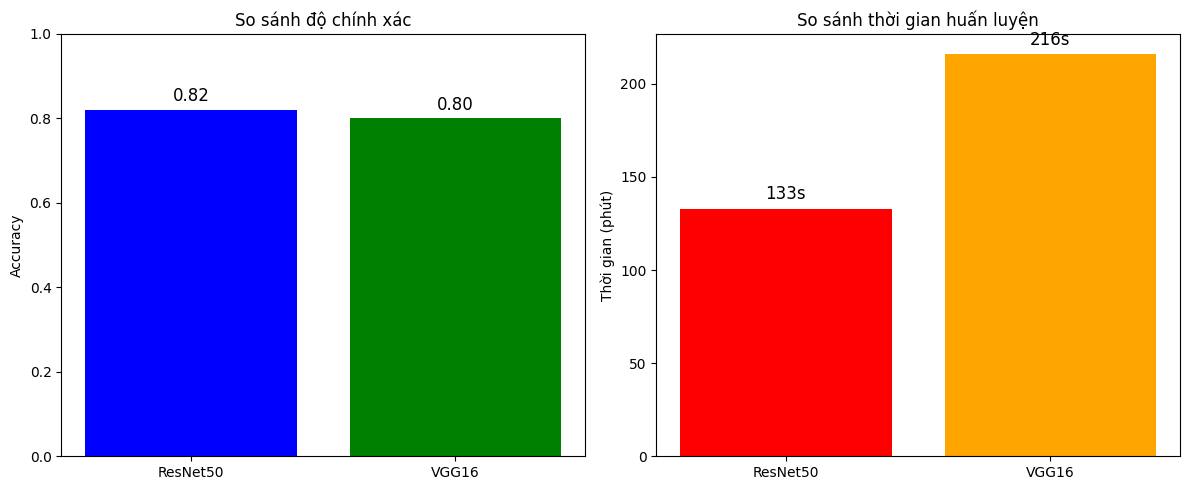

In [31]:
models = ["ResNet50", "VGG16"]
accuracy = [0.82, 0.8]  # Lấy độ chính xác từ mô hình
train_time = [133, 216]  # Lấy thời gian train từ mô hình

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu đồ độ chính xác
axes[0].bar(models, accuracy, color=['blue', 'green'])
axes[0].set_title("So sánh độ chính xác")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)

# Biểu đồ thời gian huấn luyện
axes[1].bar(models, train_time, color=['red', 'orange'])
axes[1].set_title("So sánh thời gian huấn luyện")
axes[1].set_ylabel("Thời gian (phút)")

# Hiển thị giá trị trên cột
for i, v in enumerate(accuracy):
    axes[0].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

for i, v in enumerate(train_time):
    axes[1].text(i, v + 5, f"{v:.0f}s", ha='center', fontsize=12)

plt.tight_layout()
plt.show()